## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install numerize

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from numerize import numerize

import seaborn as sns

In [ ]:
#Upload the Play Store Data file and perform EDA on the data
play_store_data_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alma Better/Capstone Project/Play Store Data.csv")

#Exploration of Data

In [ ]:
#Top 5 rows of the data (a preview of data)
play_store_data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Last 5 rows of the data 
play_store_data_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
#Number of column and number of rows 
play_store_data_df.shape

(10841, 13)

In [ ]:
#Columns
column_name = play_store_data_df.columns

In [ ]:
play_store_data_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
play_store_data_df[play_store_data_df['Price']=='0']['Price'].count()

10040

In [ ]:
play_store_data_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [ ]:
play_store_data_df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

#Definition of some features
* Reviews:- Number of reviews
* Type:- App is available 'Free' or 'Paid'.
* Size:- Size of App in MB.
* Price:- Price of App. Out of 10841 rows 10040 apps are free.
* Content Rating:- Related to age of user and availability of particular app to the age group. 
* Current Ver is version of App and Android Ver is version of android in which app will work.

In [ ]:
#Information about each column/features
play_store_data_df.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Information about the data
play_store_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#Number of null value in 'Rating' feature
play_store_data_df['Rating'].isnull().sum()

1474

In [ ]:
#Drop duplicate rows
play_store_data_df.drop_duplicates(keep=False, inplace=True)

In [ ]:
play_store_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9948 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9948 non-null   object 
 1   Category        9948 non-null   object 
 2   Rating          8491 non-null   float64
 3   Reviews         9948 non-null   object 
 4   Size            9948 non-null   object 
 5   Installs        9948 non-null   object 
 6   Type            9947 non-null   object 
 7   Price           9948 non-null   object 
 8   Content Rating  9947 non-null   object 
 9   Genres          9948 non-null   object 
 10  Last Updated    9948 non-null   object 
 11  Current Ver     9940 non-null   object 
 12  Android Ver     9945 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Handling NaN values

There are small number of NaN value in the columns 'Type', 'Content Rating', 'Current Ver', 'Android Ver'. We will drop rows containing 'NaN' corresponsding to these columns.

In [ ]:
#Remove the rows that contain NaN for some features
play_store_data_df = play_store_data_df.dropna(subset =['Type', 'Content Rating', 'Current Ver', 'Android Ver'])

In [ ]:
play_store_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9936 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9936 non-null   object 
 1   Category        9936 non-null   object 
 2   Rating          8484 non-null   float64
 3   Reviews         9936 non-null   object 
 4   Size            9936 non-null   object 
 5   Installs        9936 non-null   object 
 6   Type            9936 non-null   object 
 7   Price           9936 non-null   object 
 8   Content Rating  9936 non-null   object 
 9   Genres          9936 non-null   object 
 10  Last Updated    9936 non-null   object 
 11  Current Ver     9936 non-null   object 
 12  Android Ver     9936 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Now consider value corresponding to column 'Rating', here we can not drop the rows directly because this column has sufficient large amount of NaN value.
We will fill the NaN value in rating column with the mean of the column.



In [ ]:
#Fill the NaN value in rating column with mean of the column
mean = play_store_data_df['Rating'].mean()
play_store_data_df['Rating'].fillna(mean, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
play_store_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9936 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9936 non-null   object 
 1   Category        9936 non-null   object 
 2   Rating          9936 non-null   float64
 3   Reviews         9936 non-null   object 
 4   Size            9936 non-null   object 
 5   Installs        9936 non-null   object 
 6   Type            9936 non-null   object 
 7   Price           9936 non-null   object 
 8   Content Rating  9936 non-null   object 
 9   Genres          9936 non-null   object 
 10  Last Updated    9936 non-null   object 
 11  Current Ver     9936 non-null   object 
 12  Android Ver     9936 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Now our dataset have no NaN value.

In [ ]:
play_store_data_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9936,9936,9936.000000,9936,9936,9936,9936,9936,9936,9936,9936,9936,9936
unique,9370,33,NaN,5664,456,20,2,89,6,118,1372,2747,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1913,NaN,588,1390,1409,9208,9208,8084,840,275,1178,2312
mean,NaN,NaN,4.184371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.488512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Compare the relationship between number of installs, number of reviews and corresponding rating.

In [ ]:
#Here we remove those rows that have rating more than 5.0, because that is absurd.
new_play_df = play_store_data_df

In [ ]:
new_play_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
new_play_df.shape

(9936, 13)

In [ ]:
#Change the dtype of 'Reviews' column into int type
new_play_df["Reviews"] = new_play_df["Reviews"].astype(int)

Change the dtype of number of installs into int type. For eg. If 10,000+ is there than we change it into integer 10,000. Assuming that number of installs is 10K. 

In [ ]:
install_data = new_play_df['Installs']

In [ ]:
install_df = pd.DataFrame(install_data)

In [ ]:
install_list = install_df['Installs'].tolist()

In [ ]:
type(install_list[0])

str

In [ ]:
#Add int value in the list
install_list_int = []
for s in install_list:

  str1 = s[:-1].replace(",", "")
  str2 = float(str1)
  install_list_int.append(str2)

In [ ]:
#Add new column in dataframe
new_play_df['install_int'] = install_list_int

In [ ]:
#We can see last column is integer value of installs
new_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000.0


Create a bar graph

Text(0, 0.5, 'Average rating')

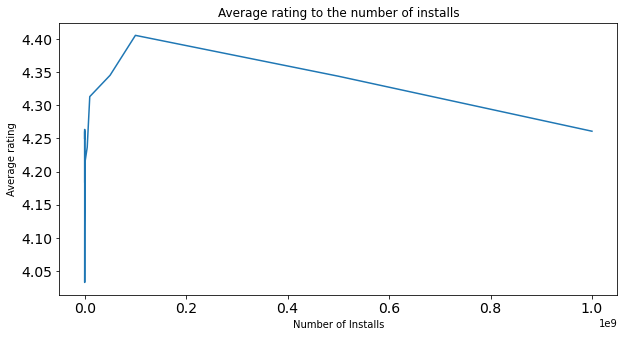

In [ ]:
#Create a bar graph for "Average rating to the number of installs".
ax = new_play_df.groupby(["install_int"])["Rating"].mean().plot.line(
    figsize = (10,5),
    fontsize = 14
)

#Title
ax.set_title("Average rating to the number of installs")

#X and Y axis labeling
ax.set_xlabel("Number of Installs")
ax.set_ylabel("Average rating")

We can see number of install doesnot affects the rating average largerly. Here line shows considerable slope but the interval of Y-axis is very small compare to interval of X-axis.

In [ ]:
column_name

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Consider rating low (< 3) which have more than 10K reviews and number of installs is more than 100k. 
We are trying to find the number of apps with such low rating and high installed number?

In [ ]:
new_play_df[(new_play_df['Rating']<3) & (new_play_df['install_int']>100_000) & (new_play_df['Reviews']>10000)]['Installs'].value_counts()

1,000,000+    2
5,000,000+    1
Name: Installs, dtype: int64

In [ ]:
new_play_df[(new_play_df['Rating']<3) & (new_play_df['install_int']>100_000) & (new_play_df['Reviews']>10000)]['App'].value_counts()

3D Holograms Joke      1
Club Penguin Island    1
PS4 Second Screen      1
Name: App, dtype: int64

##Conclusion1
There are total three such apps and they are mention above.
We can consider these three app as outliers or the apps that at the time of launch  very useful with time they become redundant ( not updated).

Now rating (> 4.5 ) with number of installs > 100k and number of reviews > 10k.
We group app by their Category.

In [ ]:
#Rating is greater than 4.5
ash = new_play_df[(new_play_df['Rating']>4.5) & (new_play_df['install_int']>100_000) & (new_play_df['Reviews']>10000)].groupby(['Category', 'App'])


In [ ]:
ash.first()

Rating  ...  install_int
Category          App                                                         ...             
ART_AND_DESIGN    Canva: Poster, banner, card maker & graphic design     4.7  ...   10000000.0
                  Colorfit - Drawing & Coloring                          4.7  ...     500000.0
                  U Launcher Lite – FREE Live Cool Themes, Hide Apps     4.7  ...    5000000.0
                  ibis Paint X                                           4.6  ...   10000000.0
AUTO_AND_VEHICLES AutoScout24 Switzerland – Find your new car            4.6  ...    1000000.0
...                                                                      ...  ...          ...
WEATHER           Fu*** Weather (Funny Weather)                          4.7  ...    1000000.0
                  Klara weather                                          4.6  ...     500000.0
                  Storm Radar: Tornado Tracker & Hurricane Alerts        4.6  ...    1000000.0
                  Weather forecast                                       4.8  ...    1000000.0
                  weather - weather forecast                             4.7  ...    1000000.0

[549 rows x 12 columns]

<!-- #From above observation we can say that there are small number of apps that are downloaded above 1 lacs has reviewed by more that 10% of user and has rating less than 3, i.e., if app is installed by more users than we can assume that the app production company is giving good services. -->
##Conclusion2
 We can study those apps production company method and functions that belong to the category in which we are going to make our app to get useful insights for the success of of our app. Eg. If we want "Auto_and_vehicle" category then we will study 'AutoScout24 Switzerland – Find your new car' app.

Create Bar plot

Text(0, 0.5, 'Average number of reviews')

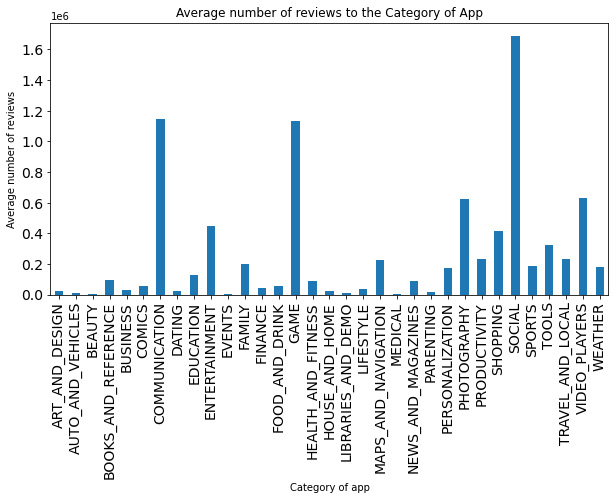

In [ ]:
#Create a bar graph between category and average number of review
ax = new_play_df.groupby(["Category"])["Reviews"].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

#Title
ax.set_title("Average number of reviews to the Category of App")

#X and Y axis labeling
ax.set_xlabel("Category of app")
ax.set_ylabel("Average number of reviews")

Text(0, 0.5, 'Average number of installs')

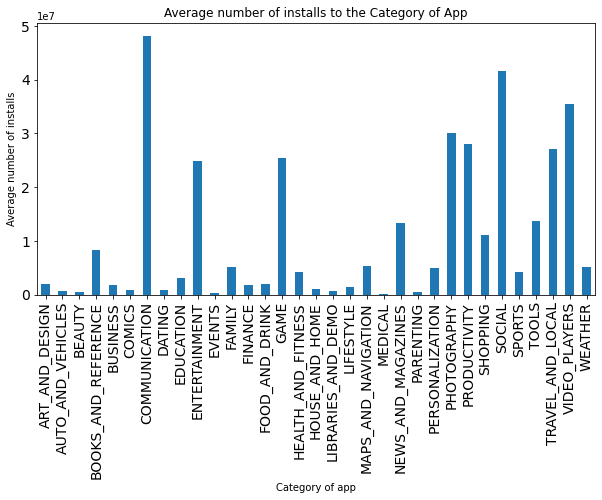

In [ ]:
#Create a bar graph between category and average number of installs
ax = new_play_df.groupby(["Category"])["install_int"].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

#Title
ax.set_title("Average number of installs to the Category of App")

#X and Y axis labeling
ax.set_xlabel("Category of app")
ax.set_ylabel("Average number of installs")

In [ ]:
new_play_df[new_play_df['Category']=="COMMUNICATION"]["App"]

337                          Messenger for SMS
338               Google Chrome: Fast & Secure
339      Messenger Lite: Free Calls & Messages
341                                   Hangouts
342                            Viber Messenger
                         ...                  
10720       Firefox Focus: The privacy browser
10734                               FP Connect
10739           FreedomPop Messaging Phone/SIM
10748                                  FP Live
10790                   HipChat - beta version
Name: App, Length: 346, dtype: object

In [ ]:
new_play_df[new_play_df['Category']=="GAME"]["App"]

1653                           ROBLOX
1654                   Subway Surfers
1655                 Candy Crush Saga
1656                        Solitaire
1657                   Bubble Shooter
                     ...             
10791               Winter Wonderland
10792          Soccer Clubs Logo Quiz
10793                       Sid Story
10803    Fatal Raid - No.1 Mobile FPS
10804                    Poker Pro.Fr
Name: App, Length: 1098, dtype: object

In [ ]:
new_play_df[new_play_df['Category']=="SOCIAL"]["App"]

2544                                        Facebook
2546                                   Facebook Lite
2547     Messages, Text and Video Chat for Messenger
2548                                          Tumblr
2549                             All Social Networks
                            ...                     
10714                  FunForMobile Ringtones & Chat
10765                Chat For Strangers - Video Chat
10799                                 Fr Daoud Lamei
10825                             Naruto & Boruto FR
10826      Frim: get new friends on local chat rooms
Name: App, Length: 267, dtype: object

Text(0, 0.5, 'Average Rating')

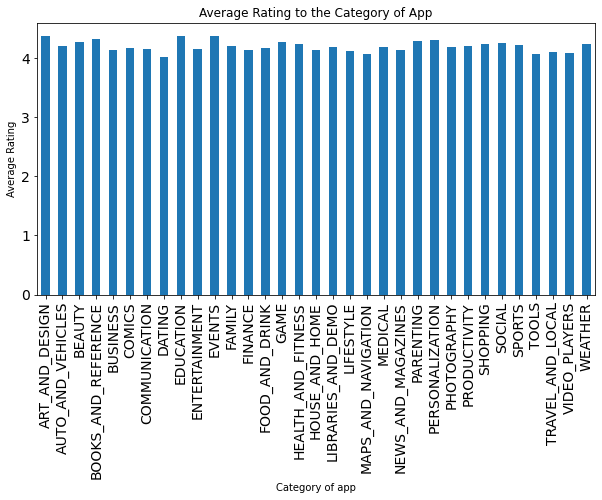

In [ ]:
#Create a bar graph
ax = new_play_df.groupby(["Category"])["Rating"].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

#Title
ax.set_title("Average Rating to the Category of App")

#X and Y axis labeling
ax.set_xlabel("Category of app")
ax.set_ylabel("Average Rating")

##Conclusion3
* We can see that from the above two bargraph Category : Comunication, Game, and Social have more average number of reviews and number of installs.   
* Communication has highest number of installs.
* Games category has more reviews but compartively less install. Means user of these cateorgy is actively reviewing the games app.
* Communication app like whatsapp, Messenger etc; Game app like Subway Surfers, Candy Crush, Solitaire etc and Social app like Facebook, Instagram, Tumblr etc.
* These three categories apps are good to produce but market is competitive. 
* Photography and Video players category are also have good number of reviews.
* In last(third) bar graph(category vs rating): Not much difference between the rating among different categories.

# Compare installs and size.
Is size affects the number of installs?

In [ ]:
new_play_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'install_int'],
      dtype='object')

In [ ]:
new_play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9936 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9936 non-null   object 
 1   Category        9936 non-null   object 
 2   Rating          9936 non-null   float64
 3   Reviews         9936 non-null   int64  
 4   Size            9936 non-null   object 
 5   Installs        9936 non-null   object 
 6   Type            9936 non-null   object 
 7   Price           9936 non-null   object 
 8   Content Rating  9936 non-null   object 
 9   Genres          9936 non-null   object 
 10  Last Updated    9936 non-null   object 
 11  Current Ver     9936 non-null   object 
 12  Android Ver     9936 non-null   object 
 13  install_int     9936 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.1+ MB


In [ ]:
new_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000.0


'Size' column is in string form we convert it into float. It also contain values "Varies with device" we will fill these values with mean of the column.

In [ ]:
# Total number of 'Varies with device' in the 'Size column.
new_play_df[new_play_df['Size']=='Varies with device']['Size'].count()

1390

In [ ]:
# Chnage into the list
size_lst = new_play_df['Size'].tolist()

In [ ]:
# First put the 0M in place of 'Varies with device'.
for i in range(len(size_lst)):
  if size_lst[i]=='Varies with device':
    size_lst[i]='0M'


In [ ]:
size_lst

['19M',
 '14M',
 '8.7M',
 '25M',
 '2.8M',
 '5.6M',
 '19M',
 '29M',
 '33M',
 '3.1M',
 '28M',
 '12M',
 '20M',
 '21M',
 '37M',
 '5.5M',
 '17M',
 '39M',
 '31M',
 '14M',
 '12M',
 '4.2M',
 '7.0M',
 '23M',
 '6.0M',
 '25M',
 '6.1M',
 '4.6M',
 '4.2M',
 '9.2M',
 '5.2M',
 '11M',
 '11M',
 '4.2M',
 '9.2M',
 '24M',
 '0M',
 '11M',
 '9.4M',
 '15M',
 '10M',
 '0M',
 '1.2M',
 '12M',
 '24M',
 '26M',
 '8.0M',
 '7.9M',
 '25M',
 '56M',
 '57M',
 '0M',
 '35M',
 '33M',
 '33M',
 '5.6M',
 '54M',
 '201k',
 '3.6M',
 '5.7M',
 '17M',
 '8.6M',
 '2.4M',
 '27M',
 '2.7M',
 '2.5M',
 '0M',
 '0M',
 '7.0M',
 '35M',
 '16M',
 '16M',
 '0M',
 '17M',
 '3.4M',
 '8.9M',
 '3.9M',
 '2.9M',
 '38M',
 '32M',
 '37M',
 '15M',
 '5.4M',
 '18M',
 '0M',
 '38M',
 '1.1M',
 '0M',
 '0M',
 '7.9M',
 '35M',
 '0M',
 '17M',
 '19M',
 '14M',
 '2.2M',
 '4.5M',
 '17M',
 '14M',
 '9.8M',
 '21M',
 '0M',
 '52M',
 '14M',
 '25M',
 '9.0M',
 '0M',
 '12M',
 '0M',
 '35M',
 '6.7M',
 '30M',
 '5.7M',
 '2.9M',
 '17M',
 '2.9M',
 '0M',
 '0M',
 '2.6M',
 '4.2M',
 '7.1M',
 

In [ ]:
# Remove the last letter 'M' and 'k' from the size and convert kb into Mb
size_int_lst =[]
for s in size_lst:
  if s[-1]=='k':
    s1 = s[:-1]
    s2 =float(s1)
    s3 = s2/1024
    size_int_lst.append(s3)
  else:
    s1 = s[:-1]
    s2 = float(s1)
    size_int_lst.append(s2)

In [ ]:
size_int_lst

[19.0,
 14.0,
 8.7,
 25.0,
 2.8,
 5.6,
 19.0,
 29.0,
 33.0,
 3.1,
 28.0,
 12.0,
 20.0,
 21.0,
 37.0,
 5.5,
 17.0,
 39.0,
 31.0,
 14.0,
 12.0,
 4.2,
 7.0,
 23.0,
 6.0,
 25.0,
 6.1,
 4.6,
 4.2,
 9.2,
 5.2,
 11.0,
 11.0,
 4.2,
 9.2,
 24.0,
 0.0,
 11.0,
 9.4,
 15.0,
 10.0,
 0.0,
 1.2,
 12.0,
 24.0,
 26.0,
 8.0,
 7.9,
 25.0,
 56.0,
 57.0,
 0.0,
 35.0,
 33.0,
 33.0,
 5.6,
 54.0,
 0.1962890625,
 3.6,
 5.7,
 17.0,
 8.6,
 2.4,
 27.0,
 2.7,
 2.5,
 0.0,
 0.0,
 7.0,
 35.0,
 16.0,
 16.0,
 0.0,
 17.0,
 3.4,
 8.9,
 3.9,
 2.9,
 38.0,
 32.0,
 37.0,
 15.0,
 5.4,
 18.0,
 0.0,
 38.0,
 1.1,
 0.0,
 0.0,
 7.9,
 35.0,
 0.0,
 17.0,
 19.0,
 14.0,
 2.2,
 4.5,
 17.0,
 14.0,
 9.8,
 21.0,
 0.0,
 52.0,
 14.0,
 25.0,
 9.0,
 0.0,
 12.0,
 0.0,
 35.0,
 6.7,
 30.0,
 5.7,
 2.9,
 17.0,
 2.9,
 0.0,
 0.0,
 2.6,
 4.2,
 7.1,
 57.0,
 3.7,
 22.0,
 24.0,
 7.4,
 21.0,
 3.4,
 2.9,
 3.1,
 6.4,
 3.2,
 8.2,
 9.9,
 2.9,
 23.0,
 4.6,
 3.1,
 0.0,
 4.9,
 9.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.2,
 5.4,
 0.0,
 2.8,
 5.0,
 0.0,
 5.9,
 13.0,
 

In [ ]:
import statistics
mean = statistics.mean(size_int_lst)
mode = statistics.mode(size_int_lst)
# mean_size = sum(size_int_lst)/len(size_int_lst)
print(f'mean is {mean} and mode is {mode}')

mean is 18.140957764458157 and mode is 0.0


In [ ]:
# Replace 0M size with mean of size
for i in range(len(size_int_lst)):
  if size_int_lst[i]==0:
    size_int_lst[i]=mean


In [ ]:
#Add new column as size in int
new_play_df['size_in_num'] = size_int_lst

In [ ]:
new_play_df['size_in_num'].mean()

20.678793039477878

##Outlier Analysis(Size)

Create the box plot for size of app

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


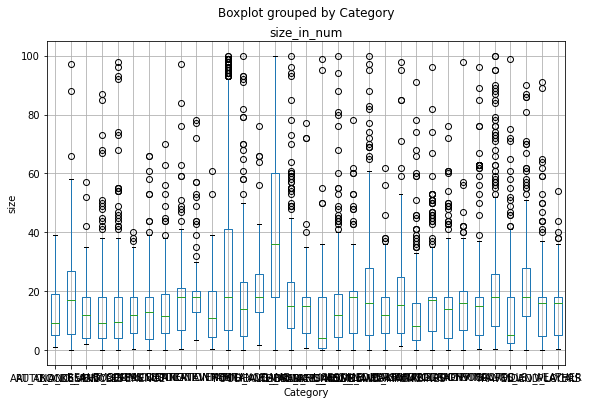

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


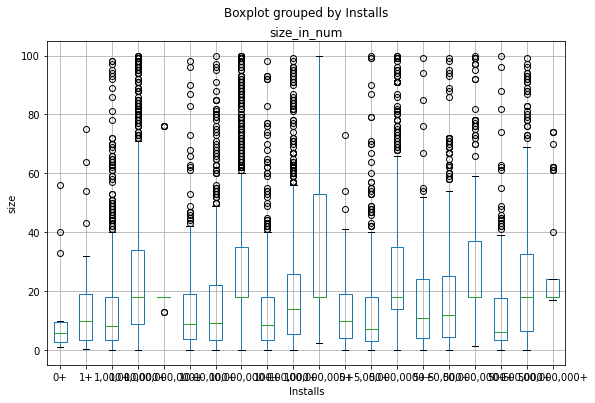

In [ ]:
for col in ['Category', 'Installs']:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  new_play_df.boxplot(column = 'size_in_num', by = col, ax = ax)
  ax.set_ylabel("size")
  plt.show()

In [ ]:
nav = new_play_df[(new_play_df['size_in_num']<1) & (new_play_df['install_int']>100_000)].groupby(['Category', 'Installs'])

In [ ]:
nav.first()

App  ...  size_in_num
Category            Installs                                     ...             
BOOKS_AND_REFERENCE 1,000,000+                     Satellite AR  ...     0.090820
COMMUNICATION       1,000,000+                      Caller ID +  ...     0.115234
                    10,000,000+   Hangouts Dialer - Call Phones  ...     0.077148
FAMILY              1,000,000+                            EXO-L  ...     0.844727
LIBRARIES_AND_DEMO  1,000,000+                    Apk Installer  ...     0.285156
                    10,000,000+      Aviary Stickers: Free Pack  ...     0.609375
                    5,000,000+          Aviary Effects: Classic  ...     0.226562
LIFESTYLE           1,000,000+          Sleep as Android Unlock  ...     0.851562
                    500,000+     Moto LED for Moto X & E [Root]  ...     0.310547
PERSONALIZATION     10,000,000+    Galactic Core Free Wallpaper  ...     0.833008
                    500,000+                  OnePlus Icon Pack  ...     0.898438
PHOTOGRAPHY         500,000+                          easyFocus  ...     0.259766
PRODUCTIVITY        1,000,000+                   Simple Notepad  ...     0.696289
                    500,000+               CamScanner (License)  ...     0.048828
SHOPPING            1,000,000+                        Ouedkniss  ...     0.827148
TOOLS               1,000,000+           NETGEAR WiFi Analytics  ...     0.679688
                    10,000,000+             Screen Off and Lock  ...     0.512695
                    5,000,000+                   BTNotification  ...     0.364258
                    500,000+                  LG BT Reader Plus  ...     0.571289

[19 rows x 13 columns]

The above app has very specific use and its service mostly use to easy(eg.BTNotification, Screen Off and Lock) and some custom related(OnePles icon pack, Sleep as Andriod unlock). Most of apps are redundant.

Conclusion: we can drop these columns that have less than 1M size as well all apps having less than 100k install, means all apps having size less than 1M.

In [ ]:
nav_ = new_play_df[(new_play_df['size_in_num']>50) & (new_play_df['install_int']>100_000)].groupby(['Category', 'Installs'])

In [ ]:
nav_.first()

App  ...  size_in_num
Category            Installs                                                        ...             
AUTO_AND_VEHICLES   1,000,000+                                Real Tractor Farming  ...         56.0
BEAUTY              1,000,000+   Sephora: Skin Care, Beauty Makeup & Fragrance ...  ...         57.0
                    500,000+                                  Beauty Selfie Camera  ...         52.0
BOOKS_AND_REFERENCE 1,000,000+                      Koran Read &MP3 30 Juz Offline  ...         67.0
                    500,000+                            English Persian Dictionary  ...         73.0
...                                                                            ...  ...          ...
TRAVEL_AND_LOCAL    500,000+                         World Travel Guide by Triposo  ...         81.0
VIDEO_PLAYERS       1,000,000+                                     OnePlus Gallery  ...         64.0
                    10,000,000+                                          AfreecaTV  ...         53.0
                    5,000,000+                                 Adobe Premiere Clip  ...         59.0
WEATHER             5,000,000+                                        METEO FRANCE  ...         54.0

[82 rows x 13 columns]

In [ ]:
#Number apps have size greater than 50M and install less than 100k.
new_play_df[(new_play_df['size_in_num']>50) & (new_play_df['install_int']<100_000)].count()

App               206
Category          206
Rating            206
Reviews           206
Size              206
Installs          206
Type              206
Price             206
Content Rating    206
Genres            206
Last Updated      206
Current Ver       206
Android Ver       206
install_int       206
size_in_num       206
dtype: int64

These are the apps that have greater than 50M in size(mean size is 21M). This shows success(installs > 100k) of app with size greater than 50M.
Conclusion: We remove the apps which has size more than 50M and install 100k(there are total 214 such apps). Keep all those whose installs greater than 100k (size > 50M). 

---



In [ ]:
# df.drop(df[df['Age'] < 25].index, inplace = True)
new_play_df.drop(new_play_df[(new_play_df['size_in_num']>50) & (new_play_df['install_int']<100_000)].index, inplace = True)

In [ ]:
new_play_df.drop(new_play_df[new_play_df['size_in_num']<1].index, inplace = True)

In [ ]:
new_play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9420 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9420 non-null   object 
 1   Category        9420 non-null   object 
 2   Rating          9420 non-null   float64
 3   Reviews         9420 non-null   int64  
 4   Size            9420 non-null   object 
 5   Installs        9420 non-null   object 
 6   Type            9420 non-null   object 
 7   Price           9420 non-null   object 
 8   Content Rating  9420 non-null   object 
 9   Genres          9420 non-null   object 
 10  Last Updated    9420 non-null   object 
 11  Current Ver     9420 non-null   object 
 12  Android Ver     9420 non-null   object 
 13  install_int     9420 non-null   float64
 14  size_in_num     9420 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 1.1+ MB


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


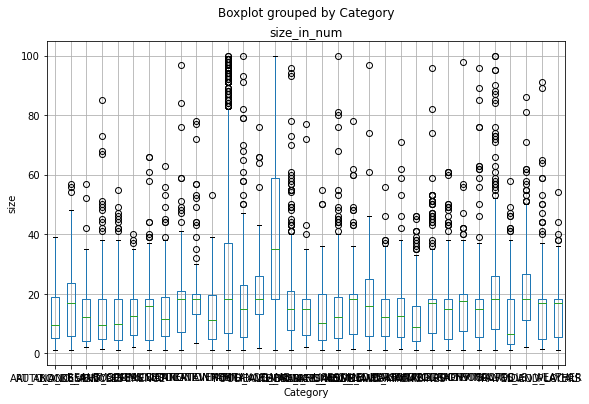

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


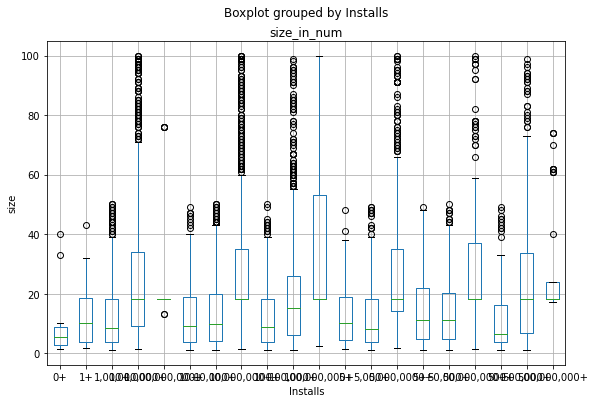

In [ ]:
for col in ['Category', 'Installs']:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  new_play_df.boxplot(column = 'size_in_num', by = col, ax = ax)
  ax.set_ylabel("size")
  plt.show()

Text(0, 0.5, 'Average size')

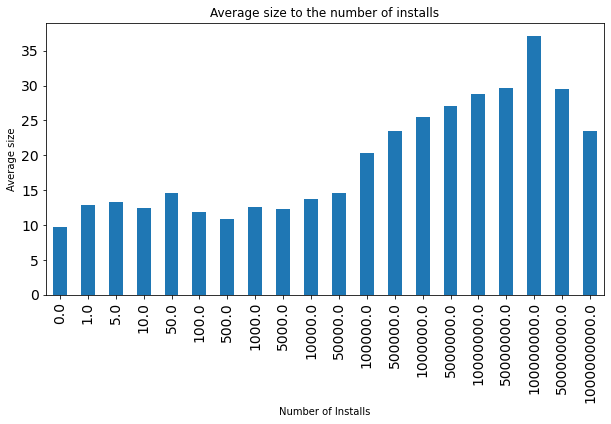

In [ ]:
#Create a bar graph for "Average size to the number of installs".
ax = new_play_df.groupby(["install_int"])["size_in_num"].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

#Title
ax.set_title("Average size to the number of installs")

#X and Y axis labeling
ax.set_xlabel("Number of Installs")
ax.set_ylabel("Average size")

As the number of install increases average size of app is also increases. Last two bar are less because very high number of installs pushing the app developers to make the app more and more good(in every update they are trying to lower the size). 

**Conclusion:** For our app if size is around and above the average size than also it will be considerable, i.e., If we add some features(that take some memory) in our app that are not very important but helpful to user, then we must go for it. 

##Conclusion
* We will go with these many outliers, because:

  * We have removed apps size that are size less than 1M that are mostly for specific uses.
  * We have removed all those apps have >50M and installs < 100k. Assumong that success of app is for installs > 100k. We can change success definition as per need.
*Therefore, all other outliers in the box plot contain some information. We go with this updated dataset.


#Distribution plot.

##Rating

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


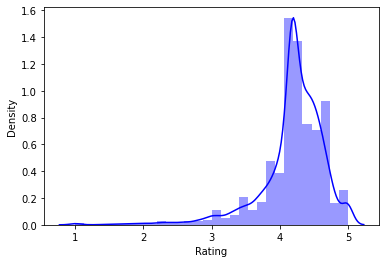

In [ ]:
res = sns.distplot(new_play_df['Rating'] ,color = 'blue', bins=30)
plt.show()

In [ ]:
new_play_df[new_play_df['Rating']>4.0]['App'].count()

7187

In [ ]:
6800/10842*100

62.71905552481092

We can see that distribution plot of rating is right skewed normal distribution with mean around 4.5. Out 10,841 different entries, 6800 has rating more than 4.0 rating, i.e., more than 62.7 % of app have this rating.

In [ ]:
new_play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9420 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9420 non-null   object 
 1   Category        9420 non-null   object 
 2   Rating          9420 non-null   float64
 3   Reviews         9420 non-null   int64  
 4   Size            9420 non-null   object 
 5   Installs        9420 non-null   object 
 6   Type            9420 non-null   object 
 7   Price           9420 non-null   object 
 8   Content Rating  9420 non-null   object 
 9   Genres          9420 non-null   object 
 10  Last Updated    9420 non-null   object 
 11  Current Ver     9420 non-null   object 
 12  Android Ver     9420 non-null   object 
 13  install_int     9420 non-null   float64
 14  size_in_num     9420 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 1.1+ MB


##Size of app

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


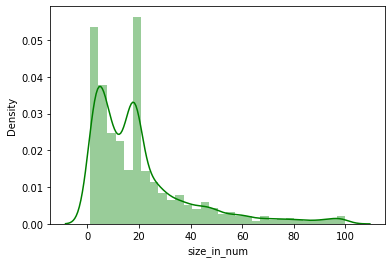

In [ ]:
res = sns.distplot(new_play_df['size_in_num'] ,color = 'g', bins=30)
plt.show()

In [ ]:
new_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int,size_in_num
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000.0,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000.0,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000.0,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000.0,2.8


In [ ]:
new_play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9420 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9420 non-null   object 
 1   Category        9420 non-null   object 
 2   Rating          9420 non-null   float64
 3   Reviews         9420 non-null   int64  
 4   Size            9420 non-null   object 
 5   Installs        9420 non-null   object 
 6   Type            9420 non-null   object 
 7   Price           9420 non-null   object 
 8   Content Rating  9420 non-null   object 
 9   Genres          9420 non-null   object 
 10  Last Updated    9420 non-null   object 
 11  Current Ver     9420 non-null   object 
 12  Android Ver     9420 non-null   object 
 13  install_int     9420 non-null   float64
 14  size_in_num     9420 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 1.1+ MB


In [ ]:
column_name

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


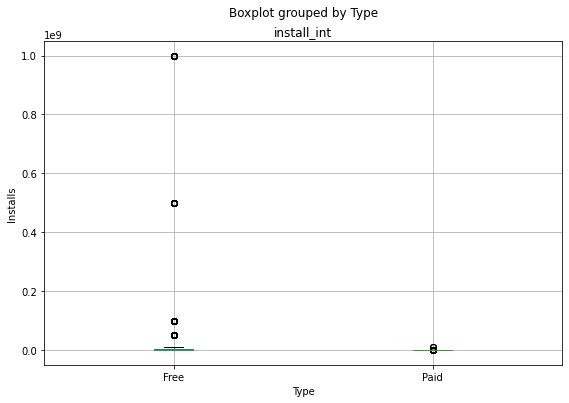

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


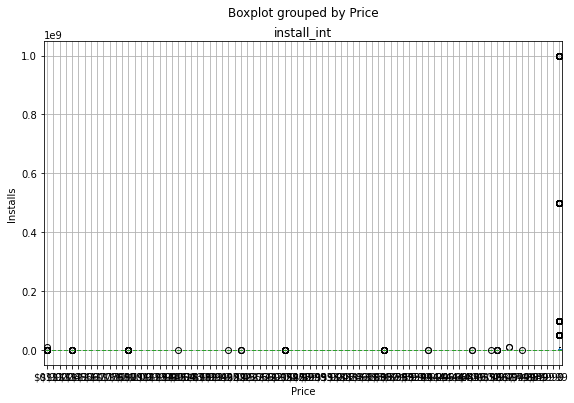

In [ ]:
for col in ['Type', 'Price']:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  new_play_df.boxplot(column = 'install_int', by = col, ax = ax)
  ax.set_ylabel("Installs")
  plt.show()



In [ ]:
new_play_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'install_int', 'size_in_num'],
      dtype='object')

# Number of installs,  Content Rating and genres.
We draw the pie chart and calculate the percent of app belonging to different content rating of app.

In [ ]:
#using groupby count the number of app to correspondind content rating
data = new_play_df.groupby(['Content Rating'])["Content Rating"].count()

In [ ]:
data

Content Rating
Adults only 18+       3
Everyone           7623
Everyone 10+        345
Mature 17+          389
Teen               1058
Unrated               2
Name: Content Rating, dtype: int64

In [ ]:
#Create DataFrame
data_ = pd.DataFrame(data)

In [ ]:
data_

,Content Rating
Content Rating,
Adults only 18+,3
Everyone,7623
Everyone 10+,345
Mature 17+,389
Teen,1058
Unrated,2


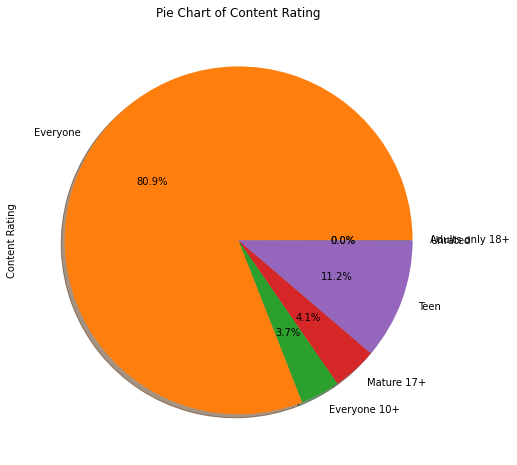

In [ ]:
#Create a pie chart
plot = data_.plot.pie(y='Content Rating', title="Pie Chart of Content Rating", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0, figsize = (8,8))


##Conclusion
Most of the apps belong to "Everyone" content rating. Very few app belong to 'Adult only 18+' and 'Unrate'(overlaped each other). "Teen" rating also contains good amount of apps.

Draw a pie chat for the number of apps that are installed by more than 10k users. 

In [ ]:
#Collect data
installs_data =new_play_df[new_play_df['install_int']>100_000].groupby(["Installs"])["Installs"].count()

In [ ]:
#Create Data frame
installs_df = pd.DataFrame(installs_data)

In [ ]:
installs_df

,Installs
Installs,
"1,000,000+",1390
"1,000,000,000+",41
"10,000,000+",1031
"100,000,000+",337
"5,000,000+",625
"50,000,000+",258
"500,000+",487
"500,000,000+",50


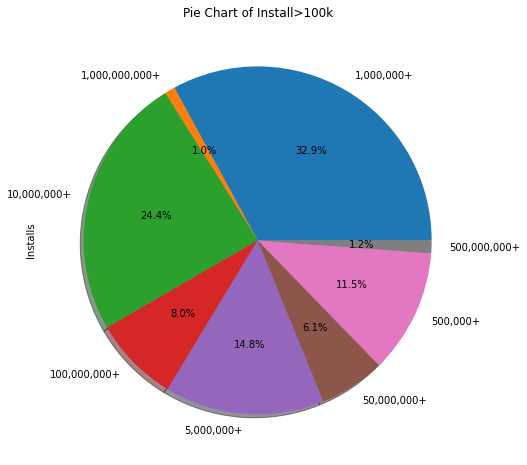

In [ ]:
plot = installs_df.plot.pie(y='Installs', title="Pie Chart of Install>100k", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0, figsize = (8,8))


In [ ]:
31.8+25.3

57.1

In [ ]:
#Number of app available to Everyone and Teen
# Number of app available not to Everyone
new_play_df[(new_play_df['Content Rating']=='Everyone') | (new_play_df['Content Rating']=='Teen')]['Category'].count()

8681

In [ ]:
# Number of app available not to Everyone and Teen
new_play_df[(new_play_df['Content Rating']!='Everyone') & (new_play_df['Content Rating']!='Teen')]['Category'].count()

739

In [ ]:
new_play_df[(new_play_df['Content Rating']=='Mature 17+')]['Category'].count()

389

In [ ]:
new_play_df[(new_play_df['Content Rating']=='Mature 17+') & (new_play_df['Type']!='Free')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int,size_in_num
476,"Moco+ - Chat, Meet People",DATING,4.200000,1545,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,10000.0,18.140958
481,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.500000,2,17M,100+,Paid,$7.99,Mature 17+,Dating,"January 21, 2017",1.0.1,4.0 and up,100.0,17.000000
571,"Moco+ - Chat, Meet People",DATING,4.200000,1546,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,10000.0,18.140958
1001,Meme Generator,ENTERTAINMENT,4.600000,3771,53M,"100,000+",Paid,$2.99,Mature 17+,Entertainment,"August 3, 2018",4.426,4.1 and up,100000.0,53.000000
4034,Hitman Sniper,GAME,4.600000,408292,29M,"10,000,000+",Paid,$0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,10000000.0,29.000000
4190,H*nest Meditation,LIFESTYLE,4.900000,145,48M,"5,000+",Paid,$1.99,Mature 17+,Lifestyle,"April 7, 2016",1.0,4.0.3 and up,5000.0,48.000000
4316,Anna.K Tarot,FAMILY,4.800000,17,23M,100+,Paid,$3.99,Mature 17+,Entertainment,"January 16, 2017",1.4.4,4.0.3 and up,100.0,23.000000
4491,"Q Alerts: QAnon Drop Notifications, Research +++",NEWS_AND_MAGAZINES,4.700000,143,26M,"5,000+",Paid,$0.99,Mature 17+,News & Magazines,"July 26, 2018",4.1.10,4.1 and up,5000.0,26.000000
4708,Mental Hospital V,GAME,4.200000,2460,25M,"50,000+",Paid,$0.99,Mature 17+,Action,"November 19, 2016",1.04,4.2 and up,50000.0,25.000000
5217,Message AI - Write Better Messages,TOOLS,4.184371,0,7.9M,100+,Paid,$2.99,Mature 17+,Tools,"July 4, 2018",1.3.1,5.0 and up,100.0,7.900000


Consider that 'Teen' is also available for everyone. Then, app that are not available for 'Everyone'( total =930), ~50%(490) of them comes under the 'Mature 17+' in the Category 'Dating' and 'Games'(majority).

##Conclusion
* From the above two pie chart we can conclude that most of the apps are available for "Everyone". 57.1% apps are downloaded by more than 1M users.
* Mostly genres 'dating' and 'games' not come under "Everyone".

#Last updated

In [ ]:
new_play_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'install_int', 'size_in_num'],
      dtype='object')

In [ ]:
new_play_df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int,size_in_num
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000.0,19.0


In [ ]:
#Convert the dates in last updated column into datetime type
import datetime

# df['Dates'] = pd. to_datetime(df['Dates'], format='%y%m%d')
new_play_df['Last Updated_datetime'] = pd.to_datetime(new_play_df['Last Updated'])

In [ ]:
new_play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9420 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   App                    9420 non-null   object        
 1   Category               9420 non-null   object        
 2   Rating                 9420 non-null   float64       
 3   Reviews                9420 non-null   int64         
 4   Size                   9420 non-null   object        
 5   Installs               9420 non-null   object        
 6   Type                   9420 non-null   object        
 7   Price                  9420 non-null   object        
 8   Content Rating         9420 non-null   object        
 9   Genres                 9420 non-null   object        
 10  Last Updated           9420 non-null   object        
 11  Current Ver            9420 non-null   object        
 12  Android Ver            9420 non-null   object        
 13  in

In [ ]:
# Number of app updated before August 01, 2016
new_play_df[new_play_df['Last Updated_datetime']< '2016-08-01']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int,size_in_num,Last Updated_datetime
144,Cool Reader,BOOKS_AND_REFERENCE,4.500000,246315,Varies with device,"10,000,000+",Free,0,Everyone,Books & Reference,"July 17, 2015",Varies with device,1.5 and up,10000000.0,18.140958,2015-07-17
170,Flybook,BOOKS_AND_REFERENCE,3.900000,1778,4.9M,"500,000+",Free,0,Mature 17+,Books & Reference,"October 16, 2014",1.0.3,2.1 and up,500000.0,4.900000,2014-10-16
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,4.184371,114,7.3M,"100,000+",Free,0,Everyone,Books & Reference,"August 7, 2015",1.1,5.1 and up,100000.0,7.300000,2015-08-07
200,SuperLivePro,BUSINESS,4.300000,46353,21M,"1,000,000+",Free,0,Everyone,Business,"April 13, 2016",2.8,1.5 and up,1000000.0,21.000000,2016-04-13
424,DU Browser—Browse fast & fun,COMMUNICATION,4.300000,1133501,4.7M,"10,000,000+",Free,0,Everyone,Communication,"April 1, 2016",6.4.0.4,4.0 and up,10000000.0,4.700000,2016-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10817,HTC Sense Input - FR,TOOLS,4.000000,885,8.0M,"100,000+",Free,0,Everyone,Tools,"October 30, 2015",1.0.612928,5.0 and up,100000.0,8.000000,2015-10-30
10818,Gold Quote - Gold.fr,FINANCE,4.184371,96,1.5M,"10,000+",Free,0,Everyone,Finance,"May 19, 2016",2.3,2.2 and up,10000.0,1.500000,2016-05-19
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.600000,603,7.4M,"10,000+",Free,0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up,10000.0,7.400000,2016-06-19
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.800000,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up,100000.0,2.300000,2014-01-20


Latest date that is recorded in the dataset is August 1, 2018. 


## Conclusion
Consider the app redundant that are not updated since 2 years, i.e., last updated was on August 1, 2016 or before.



In [ ]:
new_play_df.drop(new_play_df[new_play_df['Last Updated_datetime']< '2016-08-01'].index, inplace = True)

In [ ]:
new_play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8437 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   App                    8437 non-null   object        
 1   Category               8437 non-null   object        
 2   Rating                 8437 non-null   float64       
 3   Reviews                8437 non-null   int64         
 4   Size                   8437 non-null   object        
 5   Installs               8437 non-null   object        
 6   Type                   8437 non-null   object        
 7   Price                  8437 non-null   object        
 8   Content Rating         8437 non-null   object        
 9   Genres                 8437 non-null   object        
 10  Last Updated           8437 non-null   object        
 11  Current Ver            8437 non-null   object        
 12  Android Ver            8437 non-null   object        
 13  in

#Andriod Version

In [ ]:
new_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int,size_in_num,Last Updated_datetime
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000.0,19.0,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0,14.0,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000.0,8.7,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000.0,25.0,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000.0,2.8,2018-06-20


In [ ]:
and_ver = new_play_df['Android Ver'].tolist()

In [ ]:
and_ver

In [ ]:
# Andriod Ver: Consider only the main version type not the subtype( eg. for 4.0.3 consider version as 4) and replace 'Varies with device' with version 4.
and_ver_first_letter_lst = []
for s in and_ver:
  if s == 'Varies with device':
    s=4
    and_ver_first_letter_lst.append(s)
  else:
    s1 = s[0]
    s2 = int(s1)
    and_ver_first_letter_lst.append(s2)

In [ ]:
and_ver_first_letter_lst

In [ ]:
new_play_df["android Ver_int"] = and_ver_first_letter_lst

In [ ]:
new_play_df[(new_play_df["android Ver_int"]<=1) & (new_play_df['Last Updated_datetime']>"2018-01-01")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int,size_in_num,Last Updated_datetime,android Ver_int
722,English speaking texts,EDUCATION,4.400000,1619,3.0M,"1,000,000+",Free,0,Everyone,Education,"July 20, 2018",1.2,1.6 and up,1000000.0,3.0,2018-07-20,1
1547,Eternal life,LIBRARIES_AND_DEMO,5.000000,26,2.5M,"1,000+",Free,0,Everyone,Libraries & Demo,"May 24, 2018",1.0,1.6 and up,1000.0,2.5,2018-05-24,1
4411,Age of Conquest: N. America,FAMILY,4.500000,659,3.3M,"10,000+",Paid,$3.99,Everyone,Strategy,"August 4, 2018",1.0.28,1.5 and up,10000.0,3.3,2018-08-04,1
7993,2 Amateur ham radio CW Morse code practice key...,COMMUNICATION,4.800000,6,3.5M,100+,Paid,$1.49,Everyone,Communication,"March 5, 2018",1.0.9,1.6 and up,100.0,3.5,2018-03-05,1
8098,Igitabo cy'Indirimbo,FAMILY,4.500000,93,1.6M,"50,000+",Free,0,Everyone,Entertainment,"February 5, 2018",INDIRIMBO V.2014.002,1.6 and up,50000.0,1.6,2018-02-05,1
8919,Bible du Semeur-BDS (French),BOOKS_AND_REFERENCE,4.500000,313,6.9M,"50,000+",Free,0,Everyone,Books & Reference,"August 4, 2018",0.7,1.0 and up,50000.0,6.9,2018-08-04,1
8928,Proverbes du monde,FAMILY,4.184371,38,2.8M,"10,000+",Free,0,Everyone,Entertainment,"March 12, 2018",1.1.2.0,1.6 and up,10000.0,2.8,2018-03-12,1
9490,WiFi Tether Router,COMMUNICATION,4.200000,5599,1.3M,"100,000+",Paid,$2.90,Everyone,Communication,"July 2, 2018",6.2.7,1.6 and up,100000.0,1.3,2018-07-02,1
9571,The Holy Rosary,LIFESTYLE,4.700000,56197,15M,"1,000,000+",Free,0,Everyone,Lifestyle,"August 6, 2018",1.6.17,1.6 and up,1000000.0,15.0,2018-08-06,1
10459,SCI-FI UI,FAMILY,4.700000,15,3.9M,100+,Paid,$1.99,Everyone,Entertainment,"April 16, 2018",0.0.53,1.6 and up,100.0,3.9,2018-04-16,1


There are 10 apps that support android ver 1 and are updated also( Great).

In [ ]:
new_play_df['android Ver_int'].value_counts()

4    6957
2     710
5     487
3     160
6      51
7      38
1      29
8       5
Name: android Ver_int, dtype: int64

#User Review Data Exploration

In [ ]:
user_review_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alma Better/Capstone Project/User Reviews.csv")

In [ ]:
ur_df = user_review_df.copy()

In [ ]:
ur_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
ur_df.head(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


In [ ]:
ur_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
ur_df.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


In [ ]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
new_play_df[new_play_df['App']=='10 Best Foods for You']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int,size_in_num,Last Updated_datetime,android Ver_int


In [ ]:
play_copy_df = new_play_df.copy()

In [ ]:
play_copy_df.drop(['Reviews'], axis =1, inplace= True)

In [ ]:
play_copy_df.drop_duplicates(keep ="first", inplace=True)

In [ ]:
play_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7990 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   App                    7990 non-null   object        
 1   Category               7990 non-null   object        
 2   Rating                 7990 non-null   float64       
 3   Size                   7990 non-null   object        
 4   Installs               7990 non-null   object        
 5   Type                   7990 non-null   object        
 6   Price                  7990 non-null   object        
 7   Content Rating         7990 non-null   object        
 8   Genres                 7990 non-null   object        
 9   Last Updated           7990 non-null   object        
 10  Current Ver            7990 non-null   object        
 11  Android Ver            7990 non-null   object        
 12  install_int            7990 non-null   float64       
 13  si

In [ ]:
ur_copy_df = ur_df.copy()

In [ ]:
ur_copy_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
ur_copy_df.drop(['Translated_Review', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], axis =1, inplace= True)

KeyError: ignored

In [ ]:
ur_copy_df.drop(['Sentiment_Polarity'], axis =1, inplace= True)

In [ ]:
ur_copy_df.drop_duplicates(keep='first', inplace=True)

In [ ]:
ur_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3358 entries, 0 to 64236
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   App        3358 non-null   object
 1   Sentiment  2376 non-null   object
dtypes: object(2)
memory usage: 78.7+ KB
